<a href="https://colab.research.google.com/github/imranhassan87/NLP/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jul  1 05:25:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  !pip install tf-nightly
except Exception:
  pass

import tensorflow as tf

%load_ext tensorboard

Uninstalling tensorboard-2.2.2:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tensorboard-2.2.2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-2.2.2
     |████████████████████████████████| 322.7MB 47kB/s 
     |████████████████████████████████| 460kB 49.5MB/s 
     |████████████████████████████████| 3.0MB 47.4MB/s 


In [3]:
print(tf.__version__)

2.4.0-dev20200630


In [4]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard 2.2.2
tensorboard-plugin-wit 1.6.0.post3


In [5]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

In [6]:
import tensorflow_datasets as tfds

In [7]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset  = dataset['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incomplete9ZO09U/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [ ]:
print(train_dataset)

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [ ]:
len(list(train_dataset))

104975

In [8]:
BUFFER_SIZE=3000
BATCH_SIZE=128 #using mini-batch GD

In [9]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [ ]:
for reviews in train_dataset.take(2):
    print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'13113064'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00O4D5GPS'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'844349050'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Sony ICFCS15IP 30-Pin iPod/iPhone Speaker Dock (Black) (Discontinued by Manufacturer) (Certified Refurbished)'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'I purchased this dock for my 11 year old daughters to charge her ipod. She loved the slim design because it fits on her small shelf. She also loves the sound and volume as well as dual alarms, one for school and one for sports.<br />Thank you'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2015-04-27'>, 'review

In [ ]:
for reviews in train_dataset.take(5):
    review_text=reviews['data']
    print(review_text.get('review_body').numpy())
    print(review_text.get('star_rating'))
    print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b'I purchased this dock for my 11 year old daughters to charge her ipod. She loved the slim design because it fits on her small shelf. She also loves the sound and volume as well as dual alarms, one for school and one for sports.<br />Thank you'
tf.Tensor(5, shape=(), dtype=int32)
1
b'Ordered multiples of these months ago in case they break like every other iPhone charger and not one has broke nor does it have problems or show wear and tear'
tf.Tensor(5, shape=(), dtype=int32)
1
b'All I needed was a small step ladder and a screw driver.<br />Four east steps:<br />1 Screw it to the ceiling.<br />2 Plug it in.<br />3 Park you car in the desired spot.<br />4 Chose a specific spot on the vehicle you can see from the drivers seat and aim the laser to it.<br />I actually used it to mark two different cars in the same parking bay.<br />Just make sure you have an available outlet to plug it into.<br />They make a surge protector that is rectangular and has six outlets on it that plugs right in

In [10]:
tokenizer = tfds.features.text.Tokenizer()

In [11]:
vocabulary_set = set() #set method removes all the duplicates
for _,reviews in train_dataset.enumerate():
    #printing reviews
    review_text=reviews['data']
    reviews_tokens=tokenizer.tokenize(review_text.get('review_body').numpy())
    vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [12]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [76]:
encoder.save_to_file("/content/gdrive/My Drive/sentiment_analysis_encoder.vocab")

In [75]:
# print(vocabulary_set)
print(len(vocabulary_set))


73738


In [ ]:
for reviews in train_dataset.take(5):
    review_text=reviews['data']
    print('\n')
    print(review_text.get('review_body').numpy())
    encoded_example = encoder.encode(review_text.get('review_body').numpy())
    print(encoded_example)



b'I purchased this dock for my 11 year old daughters to charge her ipod. She loved the slim design because it fits on her small shelf. She also loves the sound and volume as well as dual alarms, one for school and one for sports.<br />Thank you'
[63498, 821, 19803, 653, 38245, 26644, 39983, 27312, 45790, 44634, 2501, 20944, 54274, 46261, 72043, 3605, 3813, 38803, 7837, 17655, 22102, 9599, 59922, 54274, 33648, 70992, 72043, 70423, 31975, 3813, 50661, 54291, 41314, 10672, 17748, 10672, 22918, 29137, 27249, 38245, 62368, 54291, 27249, 38245, 17366, 73559, 20671, 37899]


b'Ordered multiples of these months ago in case they break like every other iPhone charger and not one has broke nor does it have problems or show wear and tear'
[60711, 26646, 56758, 68197, 53242, 32280, 50348, 21188, 6029, 54152, 4078, 22910, 68059, 16407, 36408, 54291, 27302, 27249, 49922, 36150, 10901, 9079, 22102, 35942, 29956, 29309, 33363, 3286, 54291, 22416]


b'All I needed was a small step ladder and a screw d

In [ ]:
for index in encoded_example:
    print('{} ---- {}'.format(index, encoder.decode([index])))

4717 ---- My
35899 ---- grandson
31975 ---- loves
3813 ---- the
38868 ---- clear
20929 ---- crystal
21188 ---- case
1442 ---- It
27302 ---- not
21107 ---- only
6501 ---- protects
3813 ---- the
14633 ---- iPod
48813 ---- Touch
72910 ---- but
59838 ---- all
3813 ---- the
25701 ---- features
71576 ---- are
19143 ---- still
908 ---- accessible
19979 ---- including
3813 ---- the
36408 ---- charger
71104 ---- The
30917 ---- price
43276 ---- was
20431 ---- great
70423 ---- also


In [13]:
def encode(text_tensor, label_tensor):
    encoded_text = encoder.encode(text_tensor.numpy())
    label = tf.where(label_tensor>=3,1,0)
    return encoded_text, label

In [14]:
def encode_map_fn(tensor):
    text = tensor['data'].get('review_body')
    label= tensor['data'].get('star_rating')
    
    encoded_text, label = tf.py_function(encode,inp=[text,label],Tout=(tf.int64,tf.int32))
    encoded_text.set_shape([None])
    label.set_shape([])
    
    return encoded_text, label

In [15]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [ ]:
for t0,t1 in ar_encoded_data.take(2):
    print(t0)
    print(t1)

#here the encoded text and the label(0,1) will be printed

tf.Tensor(
[63498   821 19803   653 38245 26644 39983 27312 45790 44634  2501 20944
 54274 46261 72043  3605  3813 38803  7837 17655 22102  9599 59922 54274
 33648 70992 72043 70423 31975  3813 50661 54291 41314 10672 17748 10672
 22918 29137 27249 38245 62368 54291 27249 38245 17366 73559 20671 37899], shape=(48,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[60711 26646 56758 68197 53242 32280 50348 21188  6029 54152  4078 22910
 68059 16407 36408 54291 27302 27249 49922 36150 10901  9079 22102 35942
 29956 29309 33363  3286 54291 22416], shape=(30,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)


In [16]:
TAKE_SIZE = 10000 #for the test_data

train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE) #take the maximum length in the batch data and padd others according to it

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE) #in each batch padd with equal number of variables

#newer versions will also take padded_shapes as an arguement 
#padded_batch(BATCH_SIZE,padded_shapes = ([None],()))

In [17]:
vocab_size += 1 #add for the padded number in the vocab which is num=0

In [ ]:
sample_text , sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(189,), dtype=int64, numpy=
 array([63498,   821, 19803,   653, 38245, 26644, 39983, 27312, 45790,
        44634,  2501, 20944, 54274, 46261, 72043,  3605,  3813, 38803,
         7837, 17655, 22102,  9599, 59922, 54274, 33648, 70992, 72043,
        70423, 31975,  3813, 50661, 54291, 41314, 10672, 17748, 10672,
        22918, 29137, 27249, 38245, 62368, 54291, 27249, 38245, 17366,
        73559, 20671, 37899,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [ ]:
for f0,f1 in test_data.take(10):
    print(tf.unique_with_counts(f1)[2].numpy()) #unique_with_counts has much info(0,1,2) here we are just taking the second index info and number to print the value


# shows the no of sentiments in batch [1(+ve),0(-ve)]

[95 33]
[35 93]
[34 94]
[97 31]
[ 27 101]
[33 95]
[102  26]
[83 45]
[106  22]
[ 22 106]


In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
#model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64,64]:
    model.add(tf.keras.layers.Dense(units,activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1))

In [19]:
!rm -r /tmp/logs/

rm: cannot remove '/tmp/logs/': No such file or directory


In [20]:
import os
import datetime

logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="/tmp/sentiment_analysis.hdf5",verbose=1,save_best_only=True)

In [21]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [22]:
history = model.fit(train_data,epochs=4, validation_data=test_data,callbacks=[tensorboard_callback, checkpointer])

Epoch 1/4
      1/Unknown - 0s 25ms/step - loss: 0.6878 - accuracy: 0.2578WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


      2/Unknown - 1s 304ms/step - loss: 0.6731 - accuracy: 0.2344WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2048s vs `on_train_batch_end` time: 0.3769s). Check your callbacks.


    742/Unknown - 212s 286ms/step - loss: 0.2996 - accuracy: 0.8674
Epoch 00001: val_loss improved from inf to 0.25696, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 228s 308ms/step - loss: 0.2996 - accuracy: 0.8674 - val_loss: 0.2570 - val_accuracy: 0.8953
Epoch 2/4
742/742 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.9081
Epoch 00002: val_loss improved from 0.25696 to 0.23832, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 227s 306ms/step - loss: 0.2186 - accuracy: 0.9081 - val_loss: 0.2383 - val_accuracy: 0.9055
Epoch 3/4
742/742 [==============================] - ETA: 0s - loss: 0.1591 - accuracy: 0.9361
Epoch 00003: val_loss did not improve from 0.23832
742/742 [==============================] - 226s 304ms/step - loss: 0.1591 - accuracy: 0.9361 - val_loss: 0.2507 - val_accuracy: 0.9063
Epoch 4/4
742/742 [==============================] - ETA: 0s - loss: 0.1168 - accuracy: 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
model.save("/content/gdrive/My Drive/sentiment_analysis.hdf5")

In [23]:
model.save('/tmp/sentiment_analysis.hdf5')

In [24]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 118634648 Jul  1 05:47 /tmp/sentiment_analysis.hdf5


In [25]:
eval_loss, eval_acc = model.evaluate(test_data)
print('\n Eval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

79/79 [==============================] - 14s 173ms/step - loss: 0.2851 - accuracy: 0.9051

 Eval loss: 0.285, Eval accuracy: 0.905


In [26]:
for t0,t1 in test_data.take(1):
  print(t1)
  print(model.predict(t0))


tf.Tensor(
[0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1], shape=(128,), dtype=int32)
[[ 5.2187424 ]
 [ 6.3507104 ]
 [ 3.2800136 ]
 [-3.6552353 ]
 [-5.972993  ]
 [ 6.5377274 ]
 [-3.4537454 ]
 [ 6.787798  ]
 [ 7.4947543 ]
 [ 5.0795364 ]
 [-3.0026205 ]
 [ 7.662635  ]
 [ 7.452999  ]
 [ 6.364763  ]
 [-4.823874  ]
 [-3.5863297 ]
 [ 5.5332522 ]
 [ 7.9016056 ]
 [ 8.240406  ]
 [ 8.264934  ]
 [-4.400439  ]
 [ 5.9489355 ]
 [ 5.150241  ]
 [ 7.3057585 ]
 [-5.3213754 ]
 [ 7.488871  ]
 [ 2.7869318 ]
 [ 2.4689517 ]
 [ 1.6986598 ]
 [ 7.5693526 ]
 [-3.3840346 ]
 [ 3.4877737 ]
 [ 6.652664  ]
 [ 6.212177  ]
 [ 7.133289  ]
 [ 6.8794775 ]
 [ 6.504708  ]
 [ 7.5079646 ]
 [ 5.871168  ]
 [-2.4052062 ]
 [ 6.339788  ]
 [ 7.470232  ]
 [ 6.5714445 ]
 [ 6.0854325 ]
 [ 7.1025453 ]
 [ 3.1618247 ]
 [-4.50405

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
#model.get_layer('embedding').output

In [29]:
!nvidia-smi

Wed Jul  1 05:49:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    41W / 250W |   8803MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
import matplotlib.pyplot as plt

def plot_graph(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], "")
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()


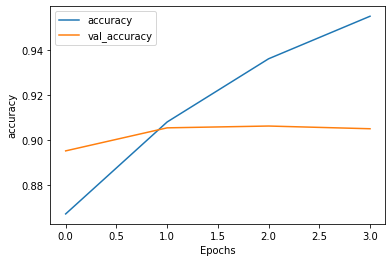

In [31]:
plot_graph(history,"accuracy")

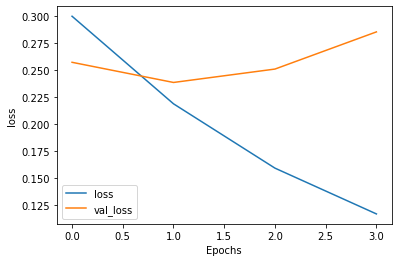

In [32]:
plot_graph(history,"loss")

In [33]:
tf.keras.backend.clear_session()
sa_load = tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5',compile=False)

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# sa_load = tf.keras.models.load_model('/content/gdrive/My Drive/Final_Sentiment_Analysis.hdf5',compile=False)

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
df = pd.read_csv('/content/gdrive/My Drive/example.csv',encoding='utf-8')

In [ ]:
df.head()

,ReviewTitles,StarRating,Review
0,What size you should get if you're built like me,4.0 out of 5 stars,I was indecisive on what size to get and I wen...
1,Just what i was looking for,5.0 out of 5 stars,This sweater is super soft! Wasn't too expensi...
2,"it fits perfect, a little bit snug but thats w...",5.0 out of 5 stars,"i got Small, im 5'2 and weight 105lb, it fits ..."
3,Cheap with Accurate Sizing,5.0 out of 5 stars,I'm 5'10 140lbs and this Medium fits perfectly...
4,Very nice!,5.0 out of 5 stars,It was a perfect fit!I very much recommend thi...


In [38]:
df['StarRating'].value_counts()

5.0 out of 5 stars    46
4.0 out of 5 stars    22
1.0 out of 5 stars    12
3.0 out of 5 stars    11
2.0 out of 5 stars     9
Name: StarRating, dtype: int64

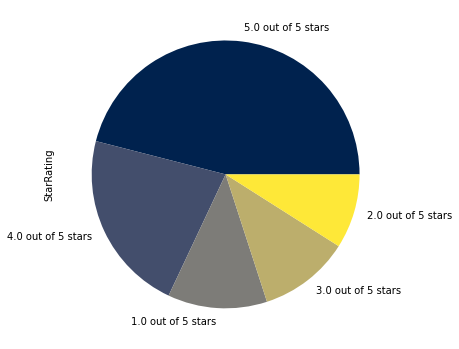

In [39]:
df['StarRating'].value_counts().plot(kind="pie",figsize=(6, 8),cmap='cividis')

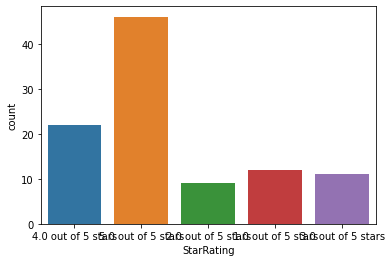

In [40]:
sns.countplot(data=df,x='StarRating')

In [41]:
rev = df['Review']

In [42]:
def pad_to_size(vec, size):
  zeros = [0] * (size -len(vec))
  vec.extend(zeros)
  return vec

In [44]:
def predict_fn(pred_text):
  for rev in pred_text:
    encoded_pred_text = encoder.encode(rev)
    # print(encoded_pred_text)
    encoded_pred_text = pad_to_size(encoded_pred_text,100)
    # print(encoded_pred_text)
    encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
    predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))
    if predictions > 1:
      print("Sentiments of this product are positive, People are happy :)") 
      return predictions
    if predictions >= 0 and predictions <= 1.8:
      print("Sentiments of this product are Netural, People are just satisfied")
      return predictions
    if predictions < 1:
      return ("Sentiments of this product are negetive, People are not satisfied with this product")

In [45]:
predictions = predict_fn(rev)
print(predictions)

Sentiments of this product are positive, People are happy :)
[[2.3988378]]


In [58]:
df1 = pd.read_csv('/content/gdrive/My Drive/win.csv',encoding='utf-8')

In [59]:
df1['StarRating'].value_counts()

1.0 out of 5 stars    24
5.0 out of 5 stars    24
2.0 out of 5 stars     8
Name: StarRating, dtype: int64

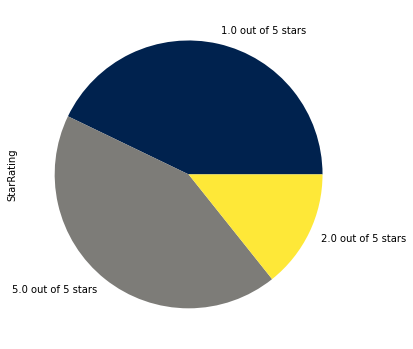

In [60]:
df1['StarRating'].value_counts().plot(kind="pie",figsize=(6, 8),cmap='cividis')

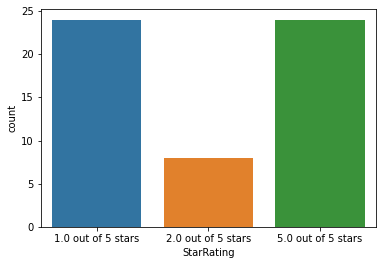

In [61]:
sns.countplot(data=df1,x='StarRating')

In [62]:
rev1 = df1['Review']

In [63]:
predictions = predict_fn(rev1)
print(predictions)

Sentiments of this product are negetive, People are not satisfied with this product


In [71]:
#for sentiment of every single review in dataset

In [68]:
def predict_fn_every_rev(pred_text):
  for rev in pred_text:
    print(rev)
    encoded_pred_text = encoder.encode(rev)
    print(encoded_pred_text)
    encoded_pred_text = pad_to_size(encoded_pred_text,100)
    print(encoded_pred_text)
    encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
    predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))
    print(predictions)

In [69]:
predictions = predict_fn_every_rev(rev1)
print(predictions)

Purchased this for a newly built computer and it does not work.  Says Product Key you entered didn't work.  Product Key invalid.  Have been online with Microsoft attempting to fix it with no luck!  Now waiting on a MS engineer to contact us.  This should not be this difficult.  Very angry and dissatisfied.  Don't waste your money.
[73659, 53317, 11980, 8603, 27439, 42032, 51385, 67536, 26173, 9408, 40325, 45906, 47194, 8557, 8045, 52539, 46245, 24899, 50937, 45906, 8557, 8045, 8320, 2471, 73619, 38908, 54603, 72887, 13879, 4166, 42619, 26173, 54603, 37001, 7917, 42500, 47809, 61693, 8603, 42482, 62587, 4166, 27386, 8985, 24647, 26884, 40325, 20385, 53317, 3366, 33746, 41779, 67536, 69639, 70233, 50937, 27737, 42615, 68655]
[73659, 53317, 11980, 8603, 27439, 42032, 51385, 67536, 26173, 9408, 40325, 45906, 47194, 8557, 8045, 52539, 46245, 24899, 50937, 45906, 8557, 8045, 8320, 2471, 73619, 38908, 54603, 72887, 13879, 4166, 42619, 26173, 54603, 37001, 7917, 42500, 47809, 61693, 8603, 4248

In [ ]:
#if you want to test out this model you can write sentiment yourself

In [46]:
def predict_fn_one_sentiment(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text,100)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  prediction = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))
  if prediction > 1:
    print("Sentiment of this review is positive :)") 
    return prediction
  if prediction >= 0 and prediction <= 2:
    print("Sentiment of this review is Netural,just satisfying")
    return prediction
  if prediction < 1:
    print("Sentiment of this product is negetive :(")
    return prediction
  

In [50]:
pred_text=input("Write sentense to check sentiment: ")
prediction=predict_fn_one_sentiment(pred_text)
print(prediction)

Write sentense to check sentiment: I will not recommend it. Very disappointed Terrible quality. The material is so thin it's almost see-through and at the first wash they shrunk a lot. Runs very small. My son wears size 2/3 years, I bought a 4 so he could grow into them but as you can see from the picture it wasĺ really tiny
[32741, 37555, 40325, 18026, 26173, 33746, 25965, 51914, 6938, 12665, 43305, 49730, 41740, 34375, 26173, 12073, 44131, 68963, 9771, 67536, 48393, 41952, 16101, 70466, 53223, 16816, 8603, 5858, 63337, 19738, 6807, 10863, 20964, 48724, 53601, 72931, 18982, 44137, 32741, 6575, 8603, 22882, 41740, 1879, 3758, 55917, 61555, 68625, 31990, 35090, 52539, 68742, 68963, 25652, 41952, 71425, 26173, 73739, 62807, 51775]
[32741, 37555, 40325, 18026, 26173, 33746, 25965, 51914, 6938, 12665, 43305, 49730, 41740, 34375, 26173, 12073, 44131, 68963, 9771, 67536, 48393, 41952, 16101, 70466, 53223, 16816, 8603, 5858, 63337, 19738, 6807, 10863, 20964, 48724, 53601, 72931, 18982, 44137,

In [51]:
pred_text=input("Write sentense to check sentiment: ")
prediction=predict_fn_one_sentiment(pred_text)
print(prediction)

Write sentense to check sentiment: I needed a beater type tank top for my 17 month old to help keep him cool during this TX summer. I looked everywhere & couldn't find the style I wanted any smaller than a 2T for my son who's still wearing 18M shirts. I went ahead and ordered the 2T thinking if they are like the adult Hanes beater/tank tops they run kind of small & I was right! They are a little big around the chest but they fit just fine & are perfect as a summer play/pool shirt. I am very happy with them & will most likely be getting more!
[32741, 40490, 8603, 57913, 58846, 63262, 302, 11980, 27121, 6924, 5610, 5186, 4166, 71817, 63058, 10121, 45418, 587, 53317, 21442, 15419, 32741, 64598, 14280, 65101, 50937, 43751, 41952, 23885, 32741, 14091, 42043, 22722, 14032, 8603, 73739, 11980, 27121, 20964, 42594, 12073, 41420, 45854, 7437, 54489, 32741, 22501, 57872, 67536, 1196, 41952, 73739, 33067, 36345, 53223, 58238, 29265, 41952, 28679, 11711, 57913, 63262, 27822, 53223, 20081, 36015, 6

In [64]:
pred_text=input("Write sentense to check sentiment: ")
prediction=predict_fn_one_sentiment(pred_text)
print(prediction)

Write sentense to check sentiment: Right when I opened package I was concerned with quality. Seems didn't line up and lots of extra thread. I know they are 100% cotton but they were dried on gentle cycle. Low heat for 20 mins and shrank horribly. You get what you pay for. Cheap. Picture is of a 2t/3t tank on top of a regular 2t t-shirt
[45581, 53293, 32741, 28613, 61522, 32741, 9092, 23535, 54603, 6938, 56503, 24899, 50937, 27758, 54093, 67536, 28549, 68786, 19899, 43564, 32741, 43485, 53223, 58238, 37887, 21898, 31990, 53223, 58706, 41073, 61693, 43025, 5995, 21304, 38196, 11980, 70047, 66895, 67536, 20275, 39205, 7529, 49526, 45391, 52539, 57374, 11980, 21350, 36098, 49730, 68786, 8603, 73739, 73739, 63262, 61693, 302, 68786, 8603, 28074, 73739, 50937, 2945]
[45581, 53293, 32741, 28613, 61522, 32741, 9092, 23535, 54603, 6938, 56503, 24899, 50937, 27758, 54093, 67536, 28549, 68786, 19899, 43564, 32741, 43485, 53223, 58238, 37887, 21898, 31990, 53223, 58706, 41073, 61693, 43025, 5995, 

In [53]:
pred_text=("this is good shirt, i really like it")
prediction=predict_fn_one_sentiment(pred_text)
print(prediction)

[53317, 49730, 48089, 2945, 38268, 62807, 29265, 26173]
[53317, 49730, 48089, 2945, 38268, 62807, 29265, 26173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sentiment of this review is positive :)
[[3.8501215]]
